In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_9kuyaact.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 (0000:01:00.0)


In [2]:
geo_model = gp.create_model('Perth_Basin')

In [3]:
gp.init_data(geo_model,
             extent = [337000, 400000, 6640000, 6710000, -18000, 1000],
             resolution = [100,100,100],
             path_i = os.pardir+"/data/input_data/perth_basin/Paper_GU2F_sc_faults_topo_Points.csv", 
             path_o = os.pardir+"/data/input_data/perth_basin/Paper_GU2F_sc_faults_topo_Foliations.csv")



Active grids: ['regular']


Perth_Basin  2019-08-10 13:03

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Lesueur,Default series,1,False,#015482,1
1,Permian,Default series,2,False,#9f0052,2
2,Woodada_Kockatea,Default series,3,False,#ffbe00,3
3,Yarragadee,Default series,4,False,#728f02,4
4,Eneabba,Default series,5,False,#443988,5
5,Cattamarra,Default series,6,False,#ff3f20,6
6,Cadda,Default series,7,False,#325916,7
7,Cretaceous,Default series,8,False,#5DA629,8
8,Darling,Default series,9,False,#acc2d9,9
9,Urella_North,Default series,10,False,#56ae57,10


In [5]:
del_surfaces = ['Cadda', 'Woodada_Kockatea', 'Cattamarra']

In [6]:
geo_model.delete_surfaces(del_surfaces)

,surface,series,order_surfaces,isBasement,color,id
0,Lesueur,Default series,1,False,#015482,1
1,Permian,Default series,2,False,#9f0052,2
3,Yarragadee,Default series,3,False,#728f02,3
4,Eneabba,Default series,4,False,#443988,4
7,Cretaceous,Default series,5,False,#5DA629,5
8,Darling,Default series,6,False,#acc2d9,6
9,Urella_North,Default series,7,False,#56ae57,7
10,Eneabba_South,Default series,8,False,#b2996e,8
11,Coomallo,Default series,9,False,#a8ff04,9
12,Hypo_fault_E,Default series,10,False,#69d84f,10


In [7]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
Basement,2,Erosion


In [8]:
gp.map_series_to_surfaces(geo_model, 
              {"fault_Abrolhos_Transfer": ["Abrolhos_Transfer"],
               "fault_Coomallo": ["Coomallo"],
               "fault_Eneabba_South": ["Eneabba_South"],
               "fault_Hypo_fault_W": ["Hypo_fault_W"],
               "fault_Hypo_fault_E": ["Hypo_fault_E"],
               "fault_Urella_North": ["Urella_North"],
               "fault_Urella_South": ["Urella_South"],
               "fault_Darling": ["Darling"],
               "Sedimentary_Series": ['Cretaceous', 
                                      'Yarragadee', 
                                      'Eneabba',
                                      'Lesueur',
                                      'Permian']
              })


,surface,series,order_surfaces,isBasement,color,id
15,Abrolhos_Transfer,fault_Abrolhos_Transfer,1,False,#d4ffff,1
11,Coomallo,fault_Coomallo,1,False,#a8ff04,2
10,Eneabba_South,fault_Eneabba_South,1,False,#b2996e,3
13,Hypo_fault_W,fault_Hypo_fault_W,1,False,#894585,4
12,Hypo_fault_E,fault_Hypo_fault_E,1,False,#69d84f,5
9,Urella_North,fault_Urella_North,1,False,#56ae57,6
14,Urella_South,fault_Urella_South,1,False,#70b23f,7
8,Darling,fault_Darling,1,False,#acc2d9,8
0,Lesueur,Sedimentary_Series,1,False,#015482,9
1,Permian,Sedimentary_Series,2,False,#9f0052,10


In [9]:
geo_model.series

,order_series,BottomRelation
fault_Abrolhos_Transfer,1,Erosion
fault_Coomallo,2,Erosion
fault_Eneabba_South,3,Erosion
fault_Hypo_fault_W,4,Erosion
fault_Hypo_fault_E,5,Erosion
fault_Urella_North,6,Erosion
fault_Urella_South,7,Erosion
fault_Darling,8,Erosion
Sedimentary_Series,9,Erosion
Basement,10,Erosion


In [10]:
order_series = ["fault_Abrolhos_Transfer",
                "fault_Coomallo",
                "fault_Eneabba_South",
               "fault_Hypo_fault_W",
                "fault_Hypo_fault_E",
              "fault_Urella_North",
              "fault_Darling",
              "fault_Urella_South",
              "Sedimentary_Series", 'Basement']

geo_model.reorder_series(order_series)

,order_series,BottomRelation
fault_Abrolhos_Transfer,1,Erosion
fault_Coomallo,2,Erosion
fault_Eneabba_South,3,Erosion
fault_Hypo_fault_W,4,Erosion
fault_Hypo_fault_E,5,Erosion
fault_Urella_North,6,Erosion
fault_Darling,7,Erosion
fault_Urella_South,8,Erosion
Sedimentary_Series,9,Erosion
Basement,10,Erosion


Drop input data from the deleted series:

In [11]:
geo_model.surface_points.df.dropna(inplace=True)
geo_model.orientations.df.dropna(inplace=True)

### Select which series are faults

In [12]:
geo_model.faults

,isFault,isFinite
fault_Abrolhos_Transfer,False,False
fault_Coomallo,False,False
fault_Eneabba_South,False,False
fault_Hypo_fault_W,False,False
fault_Hypo_fault_E,False,False
fault_Urella_North,False,False
fault_Darling,False,False
fault_Urella_South,False,False
Sedimentary_Series,False,False
Basement,False,False


In [13]:
geo_model.set_is_fault(["fault_Abrolhos_Transfer",
                        "fault_Coomallo",
                        "fault_Eneabba_South",
                        "fault_Hypo_fault_W",
                        "fault_Hypo_fault_E",
                        "fault_Urella_North",
                        "fault_Darling",
                        "fault_Urella_South"])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
fault_Abrolhos_Transfer,True,False
fault_Coomallo,True,False
fault_Eneabba_South,True,False
fault_Hypo_fault_W,True,False
fault_Hypo_fault_E,True,False
fault_Urella_North,True,False
fault_Darling,True,False
fault_Urella_South,True,False
Sedimentary_Series,False,False
Basement,False,False


## Fault Network 

In [14]:
geo_model.faults.faults_relations_df

,fault_Abrolhos_Transfer,fault_Coomallo,fault_Eneabba_South,fault_Hypo_fault_W,fault_Hypo_fault_E,fault_Urella_North,fault_Darling,fault_Urella_South,Sedimentary_Series,Basement
fault_Abrolhos_Transfer,False,False,False,False,False,False,False,False,True,True
fault_Coomallo,False,False,False,False,False,False,False,False,True,True
fault_Eneabba_South,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_W,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_E,False,False,False,False,False,False,False,False,True,True
fault_Urella_North,False,False,False,False,False,False,False,False,True,True
fault_Darling,False,False,False,False,False,False,False,False,True,True
fault_Urella_South,False,False,False,False,False,False,False,False,True,True
Sedimentary_Series,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


In [15]:
fr = geo_model.faults.faults_relations_df.values

In [16]:
fr[:, :-2] = False
fr

array([[False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [17]:
geo_model.set_fault_relation(fr)

,fault_Abrolhos_Transfer,fault_Coomallo,fault_Eneabba_South,fault_Hypo_fault_W,fault_Hypo_fault_E,fault_Urella_North,fault_Darling,fault_Urella_South,Sedimentary_Series,Basement
fault_Abrolhos_Transfer,False,False,False,False,False,False,False,False,True,True
fault_Coomallo,False,False,False,False,False,False,False,False,True,True
fault_Eneabba_South,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_W,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_E,False,False,False,False,False,False,False,False,True,True
fault_Urella_North,False,False,False,False,False,False,False,False,True,True
fault_Darling,False,False,False,False,False,False,False,False,True,True
fault_Urella_South,False,False,False,False,False,False,False,False,True,True
Sedimentary_Series,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


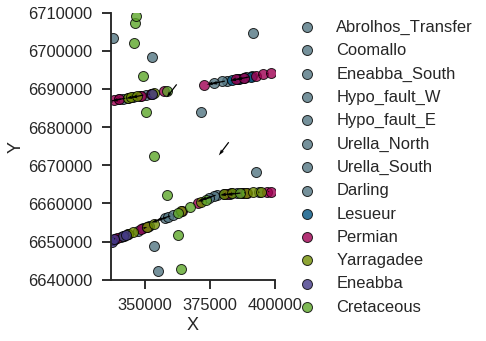

In [18]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z')

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 3.37315000e+05,  6.64035000e+06, -1.79050000e+04],
       [ 3.37315000e+05,  6.64035000e+06, -1.77150000e+04],
       [ 3.37315000e+05,  6.64035000e+06, -1.75250000e+04],
       ...,
       [ 3.98425000e+05,  6.70965000e+06, -1.25423526e+02],
       [ 3.99055000e+05,  6.70965000e+06,  1.97704643e+01],
       [ 3.99685000e+05,  6.70965000e+06,  1.32026533e+02]])

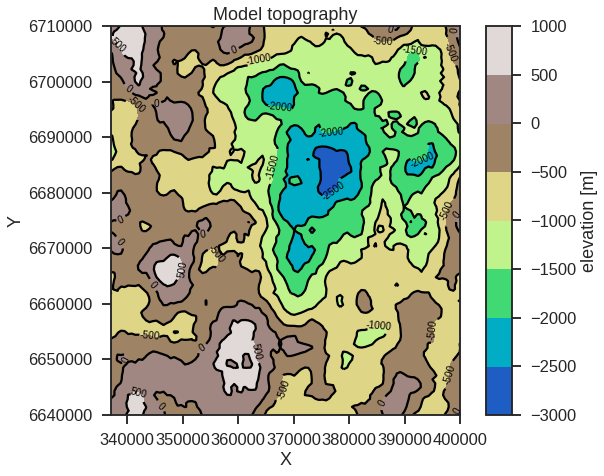

In [19]:
geo_model.set_topography(source='random')

In [20]:
#gp.plot.plot_3D(geo_model)

In [21]:
interp_data = gp.set_interpolation_data(geo_model,  
                                        compile_theano=True,
                                        theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!


In [22]:
gp.compute_model(geo_model)

/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.20507e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.88532e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.99283e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.532e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.56752e-10): result may not be accurate.
  rval


Lithology ids 
  [14.       14.       13.999999 ... 13.715946 13.634108 13.520362] 

../../gempy/plot/visualization_2d.py:241: UserWarning: No contour levels were found within the data range.
  colors=self._cmap.colors[f_id], linestyles='solid')


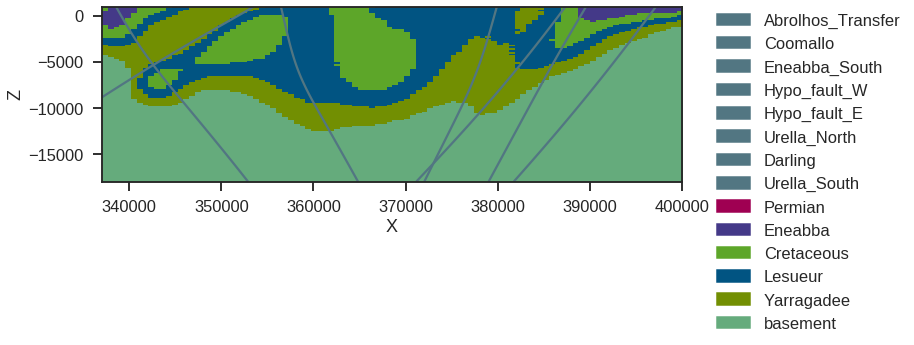

In [23]:
gp.plot.plot_section(geo_model, 25)

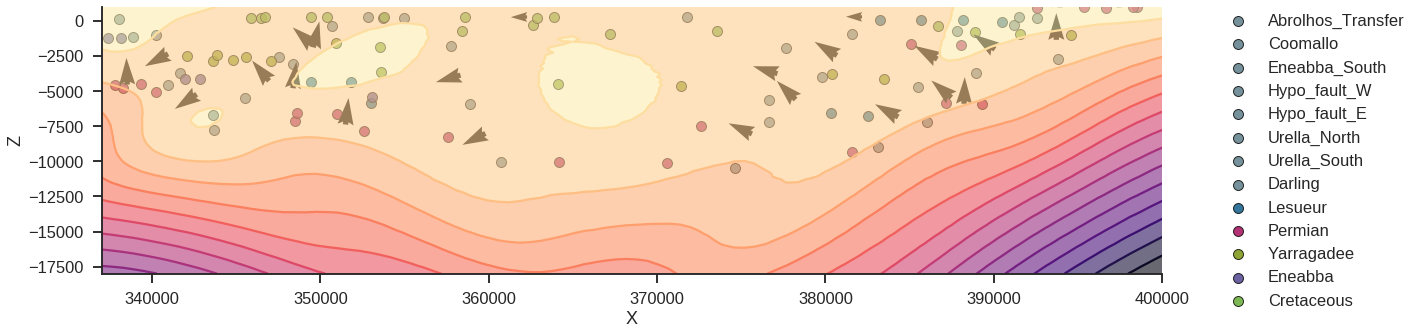

In [24]:
gp.plot.plot_scalar_field(geo_model, 25, series=-1)

../../gempy/plot/visualization_2d.py:241: UserWarning: No contour levels were found within the data range.
  colors=self._cmap.colors[f_id], linestyles='solid')


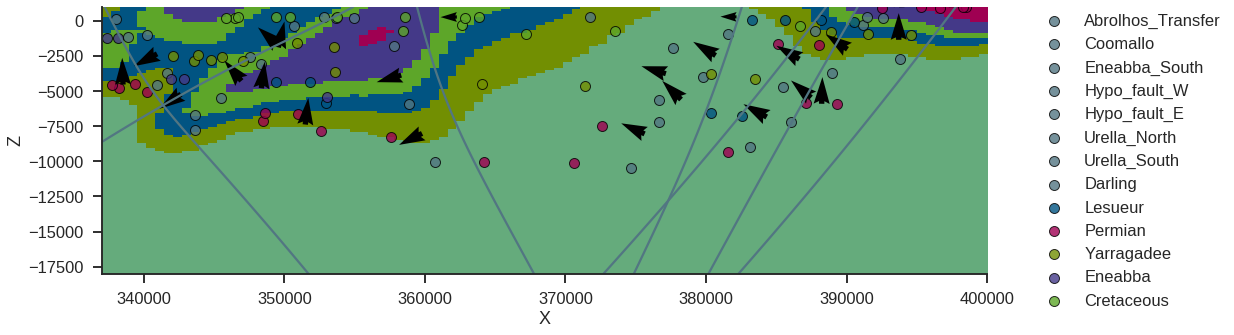

In [25]:
gp.plot.plot_section(geo_model, 12, direction="y", show_data=True)

In [26]:
gp.plot.plot_3D(geo_model, render_data=True, bg_color=(1,1,1))

closing vtk


## Times

#### Fast run
- 1M voxels:
  + CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8  15 s ± 1.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)   
  + GPU (4gb) not enough memmory
  
- 250k voxels
    + GPU 1050Ti: 3.11 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    + CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8  2.27 s ± 47.3 ms
     + 
    
#### Fast Compile
- 250k voxels
    + GPU 1050Ti: 3.7 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    + CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8  14.2 s ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

    

In [27]:
# %%timeit
# gp.compute_model(geo_model)

In [28]:
# ver = np.load('ver.npy')
# sim = np.load('sim.npy')
# lith_block = np.load('lith.npy')

In [29]:
# Not updated to GemPy v2 yet
#ste = gp.steno3D(geo_data, 'PerthBasin')
# ste.plot3D_steno_grid(lith_block)
# ste.plot3D_steno_surface(ver, sim)
# ste.proj.upload()